In [15]:
### This notebook contains 1.b and 1.c code and is meant to keep the original notebook clean
# This notebook will also include some abstractions so that code isn't merely copied and pasted

In [16]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

In [17]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [18]:
torch.cuda.is_available()

True

In [19]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [20]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

In [21]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [22]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
# print('##### GENERATOR #####')
# print(generator)
# print('######################')
# print('\n##### DISCRIMINATOR #####')
# print(discriminator)
# print('######################')

In [23]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [24]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)

In [25]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [26]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [27]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

118it [00:06, 19.08it/s]                         


Epoch 1 of 200
Generator loss: 1.16852593, Discriminator loss: 0.54147017


118it [00:06, 19.03it/s]                         


Epoch 2 of 200
Generator loss: 2.95872545, Discriminator loss: 0.13472955


118it [00:06, 19.12it/s]                         


Epoch 3 of 200
Generator loss: 2.99433994, Discriminator loss: 0.19021174


118it [00:06, 19.21it/s]                         


Epoch 4 of 200
Generator loss: 6.39468765, Discriminator loss: 0.22835937


118it [00:06, 19.05it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


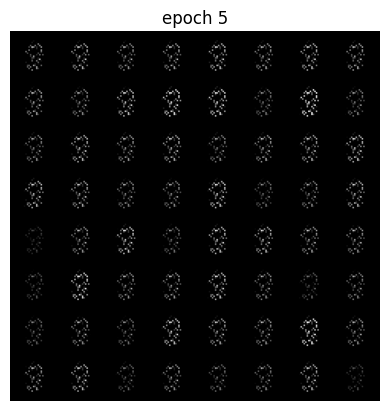

Epoch 5 of 200
Generator loss: 10.77354145, Discriminator loss: 0.13804208


118it [00:06, 18.94it/s]                         


Epoch 6 of 200
Generator loss: 4.88523912, Discriminator loss: 0.16923971


118it [00:06, 18.87it/s]                         


Epoch 7 of 200
Generator loss: 5.64019632, Discriminator loss: 0.16579236


118it [00:06, 19.16it/s]                         


Epoch 8 of 200
Generator loss: 12.50280094, Discriminator loss: 0.17880772


118it [00:06, 19.11it/s]                         


Epoch 9 of 200
Generator loss: 9.46174908, Discriminator loss: 0.12028099


118it [00:06, 19.32it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


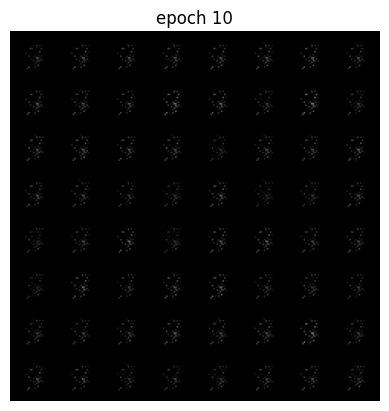

Epoch 10 of 200
Generator loss: 3.16829991, Discriminator loss: 0.22368078


118it [00:06, 19.27it/s]                         


Epoch 11 of 200
Generator loss: 3.56802702, Discriminator loss: 0.16602841


118it [00:06, 19.32it/s]                         


Epoch 12 of 200
Generator loss: 3.63604903, Discriminator loss: 0.06153812


118it [00:06, 18.97it/s]                         


Epoch 13 of 200
Generator loss: 3.50880361, Discriminator loss: 0.06214716


118it [00:06, 19.22it/s]                         


Epoch 14 of 200
Generator loss: 3.30796051, Discriminator loss: 0.03271476


118it [00:06, 19.27it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


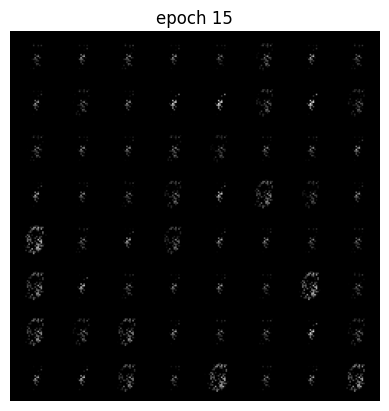

Epoch 15 of 200
Generator loss: 4.21987867, Discriminator loss: 0.03123919


118it [00:06, 19.18it/s]                         


Epoch 16 of 200
Generator loss: 4.39187145, Discriminator loss: 0.02287360


118it [00:06, 19.37it/s]                         


Epoch 17 of 200
Generator loss: 4.28267956, Discriminator loss: 0.02236995


118it [00:06, 19.13it/s]                         


Epoch 18 of 200
Generator loss: 3.80245113, Discriminator loss: 0.02153703


118it [00:06, 19.24it/s]                         


Epoch 19 of 200
Generator loss: 4.30463886, Discriminator loss: 0.02035367


118it [00:06, 19.02it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


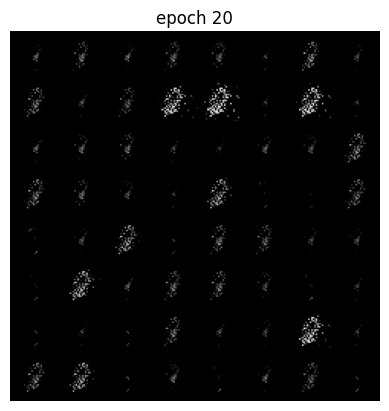

Epoch 20 of 200
Generator loss: 6.11826563, Discriminator loss: 0.04135829


118it [00:06, 19.20it/s]                         


Epoch 21 of 200
Generator loss: 5.32721090, Discriminator loss: 0.02700139


118it [00:06, 19.31it/s]                         


Epoch 22 of 200
Generator loss: 4.67681694, Discriminator loss: 0.01560400


118it [00:06, 19.43it/s]                         


Epoch 23 of 200
Generator loss: 5.13269091, Discriminator loss: 0.02267102


118it [00:06, 19.17it/s]                         


Epoch 24 of 200
Generator loss: 10.67602062, Discriminator loss: 0.19241861


118it [00:06, 19.10it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


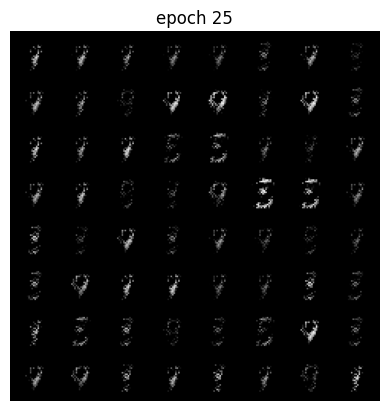

Epoch 25 of 200
Generator loss: 3.83848834, Discriminator loss: 0.06994138


118it [00:06, 18.99it/s]                         


Epoch 26 of 200
Generator loss: 4.79520655, Discriminator loss: 0.04005793


118it [00:06, 18.69it/s]                         


Epoch 27 of 200
Generator loss: 5.41348410, Discriminator loss: 0.07384731


118it [00:06, 19.34it/s]                         


Epoch 28 of 200
Generator loss: 6.05721521, Discriminator loss: 0.05537400


118it [00:06, 19.15it/s]                         


Epoch 29 of 200
Generator loss: 4.43157864, Discriminator loss: 0.03315721


118it [00:06, 19.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


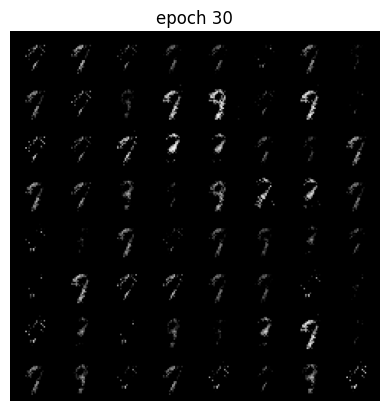

Epoch 30 of 200
Generator loss: 4.93101215, Discriminator loss: 0.04839873


118it [00:06, 19.06it/s]                         


Epoch 31 of 200
Generator loss: 4.12845373, Discriminator loss: 0.15704916


118it [00:06, 19.18it/s]                         


Epoch 32 of 200
Generator loss: 4.35711670, Discriminator loss: 0.06797022


118it [00:06, 18.93it/s]                         


Epoch 33 of 200
Generator loss: 5.57468081, Discriminator loss: 0.05522353


118it [00:06, 19.29it/s]                         


Epoch 34 of 200
Generator loss: 4.09474897, Discriminator loss: 0.07811465


118it [00:06, 19.15it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


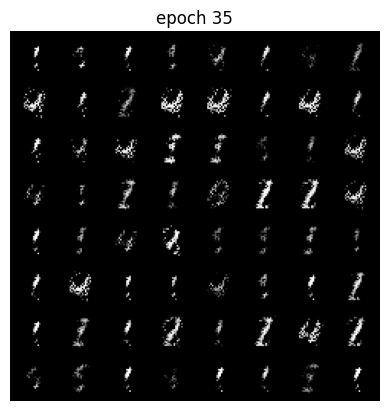

Epoch 35 of 200
Generator loss: 4.21171427, Discriminator loss: 0.06511232


118it [00:06, 19.09it/s]                         


Epoch 36 of 200
Generator loss: 5.59981155, Discriminator loss: 0.11949126


118it [00:06, 18.76it/s]                         


Epoch 37 of 200
Generator loss: 4.41266584, Discriminator loss: 0.05526270


118it [00:06, 19.03it/s]                         


Epoch 38 of 200
Generator loss: 4.77719879, Discriminator loss: 0.07659390


118it [00:06, 19.14it/s]                         


Epoch 39 of 200
Generator loss: 5.27426815, Discriminator loss: 0.14210445


118it [00:06, 18.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


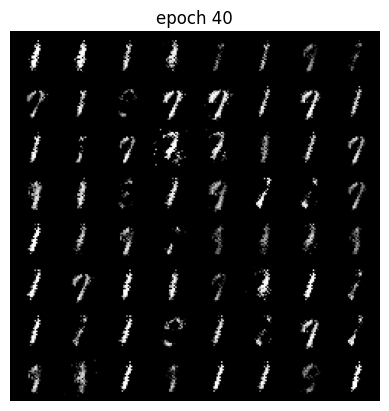

Epoch 40 of 200
Generator loss: 5.08031797, Discriminator loss: 0.05871439


118it [00:06, 18.95it/s]                         


Epoch 41 of 200
Generator loss: 4.60691023, Discriminator loss: 0.07379731


118it [00:06, 18.97it/s]                         


Epoch 42 of 200
Generator loss: 3.85107780, Discriminator loss: 0.10720131


118it [00:06, 19.13it/s]                         


Epoch 43 of 200
Generator loss: 3.62834930, Discriminator loss: 0.09884851


118it [00:06, 19.08it/s]                         


Epoch 44 of 200
Generator loss: 3.74355698, Discriminator loss: 0.10036132


118it [00:06, 19.17it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


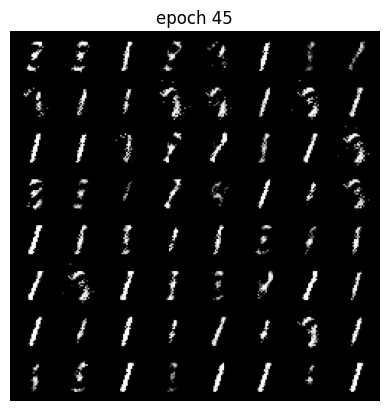

Epoch 45 of 200
Generator loss: 3.51778245, Discriminator loss: 0.09265984


118it [00:06, 18.94it/s]                         


Epoch 46 of 200
Generator loss: 3.43795490, Discriminator loss: 0.11859795


118it [00:06, 19.11it/s]                         


Epoch 47 of 200
Generator loss: 3.21975040, Discriminator loss: 0.12283793


118it [00:06, 19.07it/s]                         


Epoch 48 of 200
Generator loss: 3.32936597, Discriminator loss: 0.23491184


118it [00:06, 19.16it/s]                         


Epoch 49 of 200
Generator loss: 2.88926840, Discriminator loss: 0.13048127


118it [00:06, 19.00it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


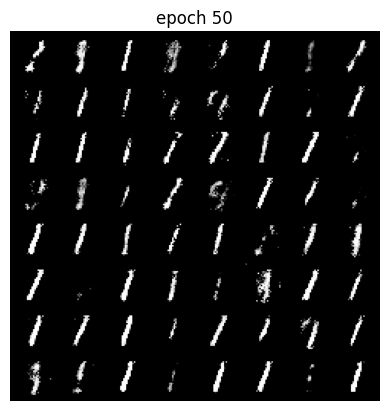

Epoch 50 of 200
Generator loss: 3.01962280, Discriminator loss: 0.11753658


118it [00:06, 18.81it/s]                         


Epoch 51 of 200
Generator loss: 3.30370164, Discriminator loss: 0.10238717


118it [00:06, 19.22it/s]                         


Epoch 52 of 200
Generator loss: 2.80242658, Discriminator loss: 0.16464849


118it [00:06, 18.75it/s]                         


Epoch 53 of 200
Generator loss: 2.90030599, Discriminator loss: 0.11652522


118it [00:06, 19.01it/s]                         


Epoch 54 of 200
Generator loss: 2.77563238, Discriminator loss: 0.15253800


118it [00:06, 19.03it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


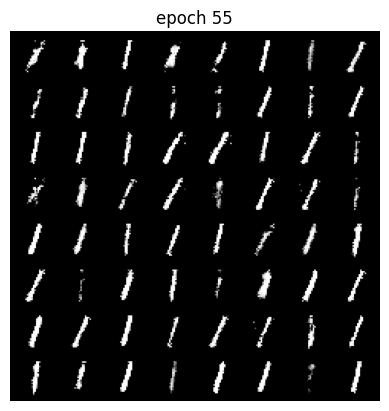

Epoch 55 of 200
Generator loss: 2.66047716, Discriminator loss: 0.13425285


118it [00:06, 19.01it/s]                         


Epoch 56 of 200
Generator loss: 2.92026758, Discriminator loss: 0.11895400


118it [00:06, 19.16it/s]                         


Epoch 57 of 200
Generator loss: 2.62656784, Discriminator loss: 0.13833417


118it [00:06, 18.96it/s]                         


Epoch 58 of 200
Generator loss: 2.65729833, Discriminator loss: 0.13732077


118it [00:06, 18.94it/s]                         


Epoch 59 of 200
Generator loss: 2.54598784, Discriminator loss: 0.14336881


118it [00:06, 18.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


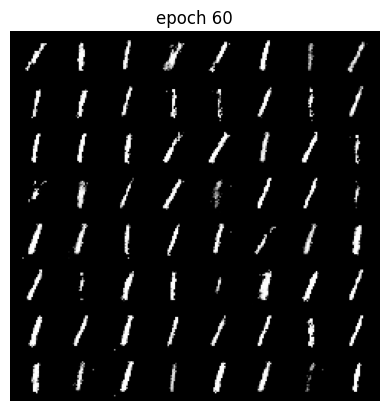

Epoch 60 of 200
Generator loss: 2.94851184, Discriminator loss: 0.23521794


118it [00:06, 19.11it/s]                         


Epoch 61 of 200
Generator loss: 2.42181182, Discriminator loss: 0.14413859


118it [00:06, 19.16it/s]                         


Epoch 62 of 200
Generator loss: 2.20292020, Discriminator loss: 0.20102406


118it [00:06, 19.12it/s]                         


Epoch 63 of 200
Generator loss: 2.30635929, Discriminator loss: 0.16478407


118it [00:06, 19.02it/s]                         


Epoch 64 of 200
Generator loss: 2.37447333, Discriminator loss: 0.16701284


118it [00:06, 19.06it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


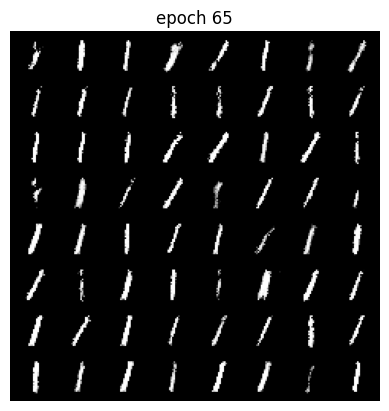

Epoch 65 of 200
Generator loss: 2.03812003, Discriminator loss: 0.22104955


118it [00:06, 18.59it/s]                         


Epoch 66 of 200
Generator loss: 2.13155627, Discriminator loss: 0.18793201


118it [00:06, 19.02it/s]                         


Epoch 67 of 200
Generator loss: 2.11252165, Discriminator loss: 0.20560077


118it [00:06, 18.95it/s]                         


Epoch 68 of 200
Generator loss: 1.90353489, Discriminator loss: 0.23915154


118it [00:06, 19.03it/s]                         


Epoch 69 of 200
Generator loss: 1.90745819, Discriminator loss: 0.28714046


118it [00:06, 19.10it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


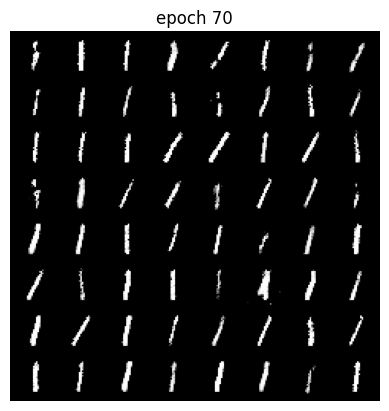

Epoch 70 of 200
Generator loss: 1.80577457, Discriminator loss: 0.25347486


118it [00:06, 19.15it/s]                         


Epoch 71 of 200
Generator loss: 1.71569145, Discriminator loss: 0.25686726


118it [00:06, 19.06it/s]                         


Epoch 72 of 200
Generator loss: 1.69801354, Discriminator loss: 0.29303092


118it [00:06, 18.56it/s]                         


Epoch 73 of 200
Generator loss: 1.84172344, Discriminator loss: 0.23813717


118it [00:06, 19.06it/s]                         


Epoch 74 of 200
Generator loss: 1.76571476, Discriminator loss: 0.28316021


118it [00:06, 19.00it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


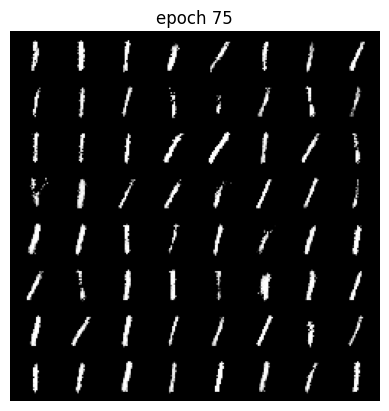

Epoch 75 of 200
Generator loss: 1.76626360, Discriminator loss: 0.24909663


118it [00:06, 18.96it/s]                         


Epoch 76 of 200
Generator loss: 1.87675679, Discriminator loss: 0.22774614


118it [00:06, 18.99it/s]                         


Epoch 77 of 200
Generator loss: 1.92463171, Discriminator loss: 0.20367755


118it [00:06, 19.15it/s]                         


Epoch 78 of 200
Generator loss: 1.72045422, Discriminator loss: 0.36944142


118it [00:06, 19.02it/s]                         


Epoch 79 of 200
Generator loss: 1.76444030, Discriminator loss: 0.24919713


118it [00:06, 18.62it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


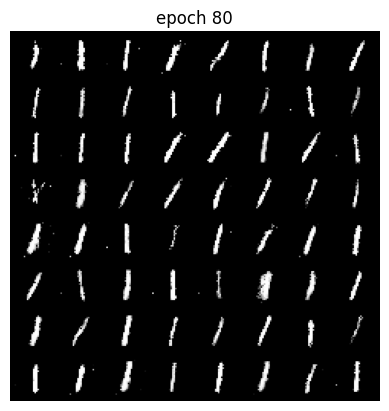

Epoch 80 of 200
Generator loss: 1.90654588, Discriminator loss: 0.22091337


118it [00:06, 18.84it/s]                         


Epoch 81 of 200
Generator loss: 1.80850780, Discriminator loss: 0.30727676


118it [00:06, 19.09it/s]                         


Epoch 82 of 200
Generator loss: 1.73564732, Discriminator loss: 0.24537143


118it [00:06, 18.66it/s]                         


Epoch 83 of 200
Generator loss: 1.76575899, Discriminator loss: 0.24270998


118it [00:06, 18.95it/s]                         


Epoch 84 of 200
Generator loss: 1.88782108, Discriminator loss: 0.23144186


118it [00:06, 19.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


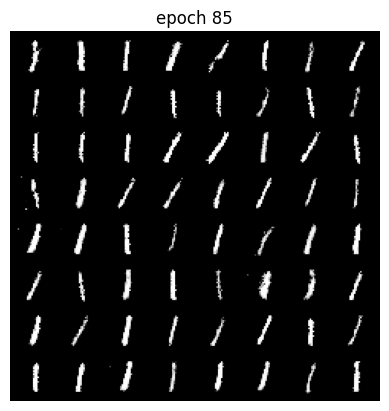

Epoch 85 of 200
Generator loss: 1.84410477, Discriminator loss: 0.25066596


118it [00:06, 18.68it/s]                         


Epoch 86 of 200
Generator loss: 1.80681705, Discriminator loss: 0.26455355


118it [00:06, 19.10it/s]                         


Epoch 87 of 200
Generator loss: 1.82686532, Discriminator loss: 0.25841600


118it [00:06, 18.92it/s]                         


Epoch 88 of 200
Generator loss: 1.82758558, Discriminator loss: 0.26875934


118it [00:06, 19.04it/s]                         


Epoch 89 of 200
Generator loss: 1.88949287, Discriminator loss: 0.24703744


118it [00:06, 18.85it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


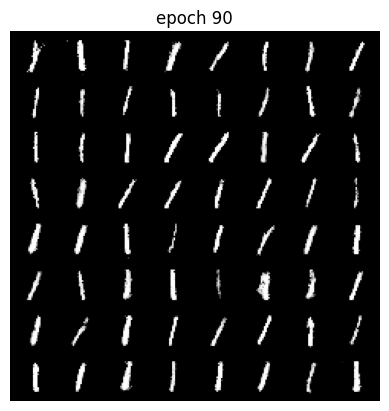

Epoch 90 of 200
Generator loss: 1.78999782, Discriminator loss: 0.27292109


118it [00:06, 18.97it/s]                         


Epoch 91 of 200
Generator loss: 1.69264495, Discriminator loss: 0.26651853


118it [00:06, 18.81it/s]                         


Epoch 92 of 200
Generator loss: 1.69540334, Discriminator loss: 0.27213627


118it [00:06, 18.72it/s]                         


Epoch 93 of 200
Generator loss: 1.64084160, Discriminator loss: 0.30270714


118it [00:06, 18.90it/s]                         


Epoch 94 of 200
Generator loss: 1.73714030, Discriminator loss: 0.27237600


118it [00:06, 19.12it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


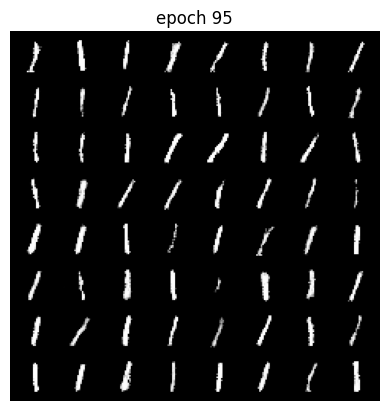

Epoch 95 of 200
Generator loss: 1.77219033, Discriminator loss: 0.27363688


118it [00:06, 18.93it/s]                         


Epoch 96 of 200
Generator loss: 1.66190064, Discriminator loss: 0.29522663


118it [00:06, 18.95it/s]                         


Epoch 97 of 200
Generator loss: 1.51630783, Discriminator loss: 0.36246413


118it [00:06, 19.14it/s]                         


Epoch 98 of 200
Generator loss: 1.61991394, Discriminator loss: 0.28341335


118it [00:06, 19.16it/s]                         


Epoch 99 of 200
Generator loss: 1.64164925, Discriminator loss: 0.27745986


118it [00:06, 18.70it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


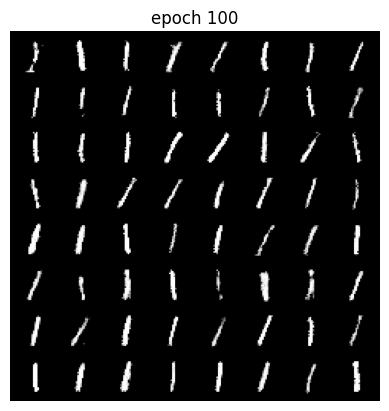

Epoch 100 of 200
Generator loss: 1.63817108, Discriminator loss: 0.29016435


118it [00:06, 18.95it/s]                         


Epoch 101 of 200
Generator loss: 1.73861623, Discriminator loss: 0.26602018


118it [00:06, 19.05it/s]                         


Epoch 102 of 200
Generator loss: 1.76238823, Discriminator loss: 0.29164517


118it [00:06, 19.02it/s]                         


Epoch 103 of 200
Generator loss: 1.57665825, Discriminator loss: 0.35259017


118it [00:06, 19.10it/s]                         


Epoch 104 of 200
Generator loss: 1.59472060, Discriminator loss: 0.28270212


118it [00:06, 18.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


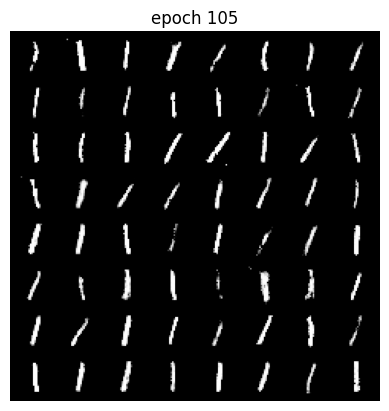

Epoch 105 of 200
Generator loss: 1.59030628, Discriminator loss: 0.29152721


118it [00:06, 18.83it/s]                         


Epoch 106 of 200
Generator loss: 1.49818349, Discriminator loss: 0.31766570


118it [00:06, 18.95it/s]                         


Epoch 107 of 200
Generator loss: 1.30825341, Discriminator loss: 0.50351608


118it [00:06, 19.10it/s]                         


Epoch 108 of 200
Generator loss: 1.36703503, Discriminator loss: 0.36406666


118it [00:06, 18.90it/s]                         


Epoch 109 of 200
Generator loss: 1.38629293, Discriminator loss: 0.33540908


118it [00:06, 18.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


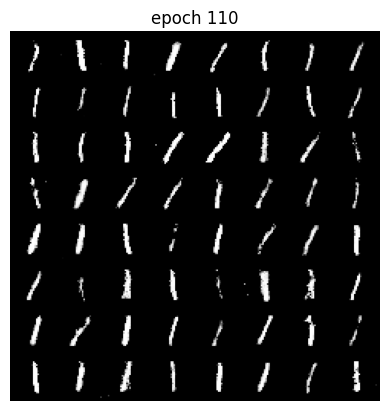

Epoch 110 of 200
Generator loss: 1.48209357, Discriminator loss: 0.31612206


118it [00:06, 18.83it/s]                         


Epoch 111 of 200
Generator loss: 1.52618361, Discriminator loss: 0.30373913


118it [00:06, 19.08it/s]                         


Epoch 112 of 200
Generator loss: 1.56542861, Discriminator loss: 0.31566754


118it [00:06, 18.91it/s]                         


Epoch 113 of 200
Generator loss: 1.58422101, Discriminator loss: 0.30678859


118it [00:06, 18.86it/s]                         


Epoch 114 of 200
Generator loss: 1.48357761, Discriminator loss: 0.33029318


118it [00:06, 19.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


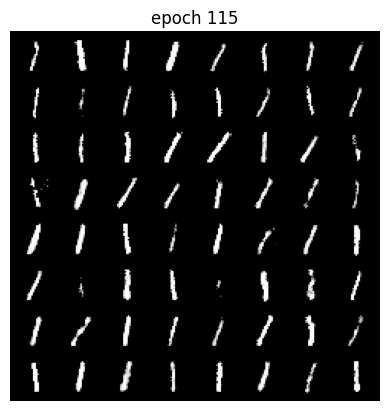

Epoch 115 of 200
Generator loss: 1.52981162, Discriminator loss: 0.32378033


118it [00:06, 18.81it/s]                         


Epoch 116 of 200
Generator loss: 1.59808445, Discriminator loss: 0.30952170


118it [00:06, 19.21it/s]                         


Epoch 117 of 200
Generator loss: 1.66707754, Discriminator loss: 0.28678265


118it [00:06, 19.13it/s]                         


Epoch 118 of 200
Generator loss: 1.75408542, Discriminator loss: 0.27865008


118it [00:06, 18.89it/s]                         


Epoch 119 of 200
Generator loss: 1.66347802, Discriminator loss: 0.29403165


118it [00:06, 18.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


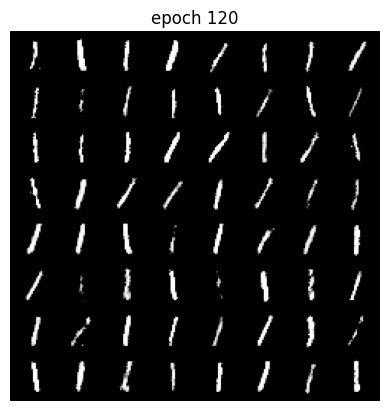

Epoch 120 of 200
Generator loss: 1.54350007, Discriminator loss: 0.33533141


118it [00:06, 18.67it/s]                         


Epoch 121 of 200
Generator loss: 1.51165986, Discriminator loss: 0.33878663


118it [00:06, 18.89it/s]                         


Epoch 122 of 200
Generator loss: 1.60150361, Discriminator loss: 0.30326027


118it [00:06, 18.99it/s]                         


Epoch 123 of 200
Generator loss: 1.74913716, Discriminator loss: 0.29831573


118it [00:06, 19.03it/s]                         


Epoch 124 of 200
Generator loss: 1.64576864, Discriminator loss: 0.29922202


118it [00:06, 19.02it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


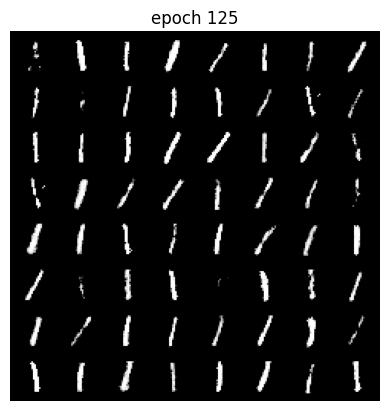

Epoch 125 of 200
Generator loss: 1.63130426, Discriminator loss: 0.29954538


118it [00:06, 18.64it/s]                         


Epoch 126 of 200
Generator loss: 1.66354752, Discriminator loss: 0.28907081


118it [00:06, 18.53it/s]                         


Epoch 127 of 200
Generator loss: 1.63885176, Discriminator loss: 0.30147645


118it [00:06, 18.86it/s]                         


Epoch 128 of 200
Generator loss: 1.68572903, Discriminator loss: 0.29190940


118it [00:06, 18.94it/s]                         


Epoch 129 of 200
Generator loss: 1.57149136, Discriminator loss: 0.31759056


118it [00:06, 19.03it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


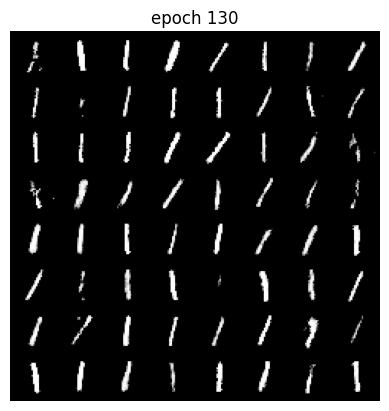

Epoch 130 of 200
Generator loss: 1.58031428, Discriminator loss: 0.31474310


118it [00:06, 18.86it/s]                         


Epoch 131 of 200
Generator loss: 1.61129272, Discriminator loss: 0.31611094


118it [00:06, 19.01it/s]                         


Epoch 132 of 200
Generator loss: 1.57092726, Discriminator loss: 0.31634456


118it [00:06, 18.80it/s]                         


Epoch 133 of 200
Generator loss: 1.58510709, Discriminator loss: 0.31351718


118it [00:06, 19.11it/s]                         


Epoch 134 of 200
Generator loss: 1.51774931, Discriminator loss: 0.32225499


118it [00:06, 19.19it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


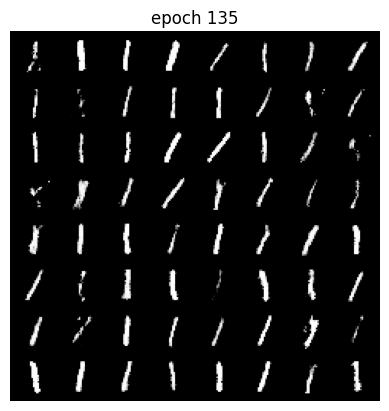

Epoch 135 of 200
Generator loss: 1.47522020, Discriminator loss: 0.34502169


118it [00:06, 19.06it/s]                         


Epoch 136 of 200
Generator loss: 1.37141263, Discriminator loss: 0.36205485


118it [00:06, 19.10it/s]                         


Epoch 137 of 200
Generator loss: 1.40338874, Discriminator loss: 0.32977170


118it [00:06, 18.99it/s]                         


Epoch 138 of 200
Generator loss: 1.48221266, Discriminator loss: 0.32704562


118it [00:06, 18.56it/s]                         


Epoch 139 of 200
Generator loss: 1.53489649, Discriminator loss: 0.31754428


118it [00:06, 18.80it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


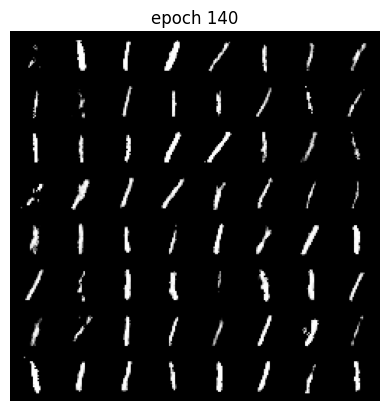

Epoch 140 of 200
Generator loss: 1.53768873, Discriminator loss: 0.31711924


118it [00:06, 18.96it/s]                         


Epoch 141 of 200
Generator loss: 1.49796379, Discriminator loss: 0.33279622


118it [00:06, 19.14it/s]                         


Epoch 142 of 200
Generator loss: 1.49329782, Discriminator loss: 0.33361328


118it [00:06, 19.11it/s]                         


Epoch 143 of 200
Generator loss: 1.49030030, Discriminator loss: 0.33490404


118it [00:06, 19.07it/s]                         


Epoch 144 of 200
Generator loss: 1.48809063, Discriminator loss: 0.31861952


118it [00:06, 19.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


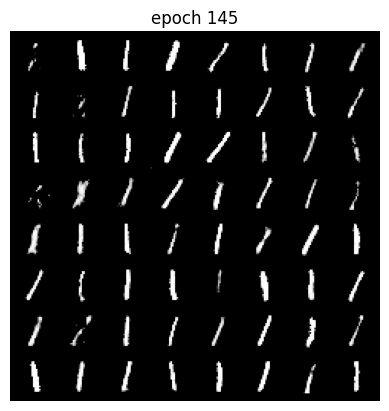

Epoch 145 of 200
Generator loss: 1.45630169, Discriminator loss: 0.32900995


118it [00:06, 18.82it/s]                         


Epoch 146 of 200
Generator loss: 1.49748397, Discriminator loss: 0.33268058


118it [00:06, 18.94it/s]                         


Epoch 147 of 200
Generator loss: 1.51526034, Discriminator loss: 0.31816870


118it [00:06, 19.11it/s]                         


Epoch 148 of 200
Generator loss: 1.47425747, Discriminator loss: 0.32885146


118it [00:06, 19.12it/s]                         


Epoch 149 of 200
Generator loss: 1.42367446, Discriminator loss: 0.35149792


118it [00:06, 19.18it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


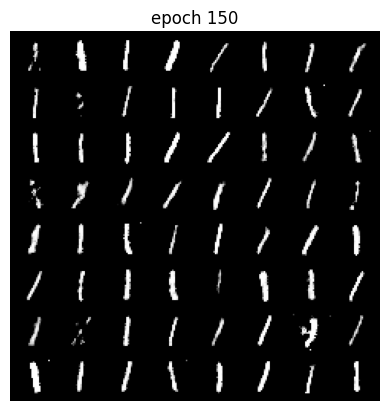

Epoch 150 of 200
Generator loss: 1.44132805, Discriminator loss: 0.33006486


118it [00:06, 19.19it/s]                         


Epoch 151 of 200
Generator loss: 1.47704995, Discriminator loss: 0.33116144


118it [00:06, 18.98it/s]                         


Epoch 152 of 200
Generator loss: 1.50434434, Discriminator loss: 0.31867057


118it [00:06, 18.81it/s]                         


Epoch 153 of 200
Generator loss: 1.49368012, Discriminator loss: 0.32821298


118it [00:06, 19.01it/s]                         


Epoch 154 of 200
Generator loss: 1.41751051, Discriminator loss: 0.34083316


118it [00:06, 19.03it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


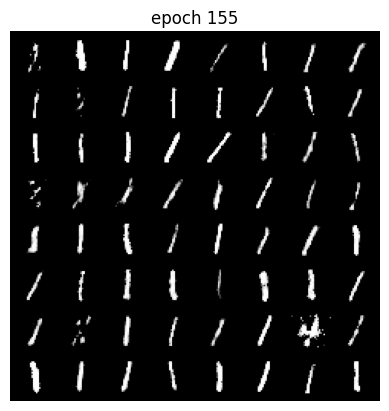

Epoch 155 of 200
Generator loss: 1.40459549, Discriminator loss: 0.35321230


118it [00:06, 19.17it/s]                         


Epoch 156 of 200
Generator loss: 1.46237814, Discriminator loss: 0.34861293


118it [00:06, 19.36it/s]                         


Epoch 157 of 200
Generator loss: 1.48796582, Discriminator loss: 0.34721184


118it [00:06, 19.12it/s]                         


Epoch 158 of 200
Generator loss: 1.50855839, Discriminator loss: 0.35376370


118it [00:06, 18.83it/s]                         


Epoch 159 of 200
Generator loss: 1.43714643, Discriminator loss: 0.34775314


118it [00:06, 19.17it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


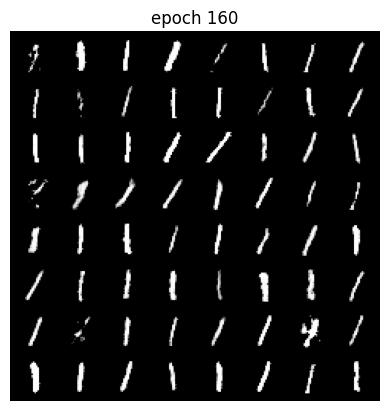

Epoch 160 of 200
Generator loss: 1.47691977, Discriminator loss: 0.33247665


118it [00:06, 19.19it/s]                         


Epoch 161 of 200
Generator loss: 1.49732816, Discriminator loss: 0.33051115


118it [00:06, 19.19it/s]                         


Epoch 162 of 200
Generator loss: 1.50372136, Discriminator loss: 0.33440354


118it [00:06, 19.01it/s]                         


Epoch 163 of 200
Generator loss: 1.42804635, Discriminator loss: 0.33055118


118it [00:06, 18.98it/s]                         


Epoch 164 of 200
Generator loss: 1.38603401, Discriminator loss: 0.34847763


118it [00:06, 19.18it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


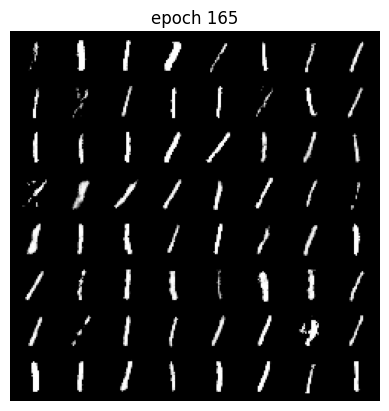

Epoch 165 of 200
Generator loss: 1.48418117, Discriminator loss: 0.33052257


118it [00:06, 18.77it/s]                         


Epoch 166 of 200
Generator loss: 1.34107006, Discriminator loss: 0.37882972


118it [00:06, 19.20it/s]                         


Epoch 167 of 200
Generator loss: 1.37216258, Discriminator loss: 0.35838249


118it [00:06, 18.92it/s]                         


Epoch 168 of 200
Generator loss: 1.44380689, Discriminator loss: 0.33470199


118it [00:06, 19.40it/s]                         


Epoch 169 of 200
Generator loss: 1.46681082, Discriminator loss: 0.33446494


118it [00:06, 19.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


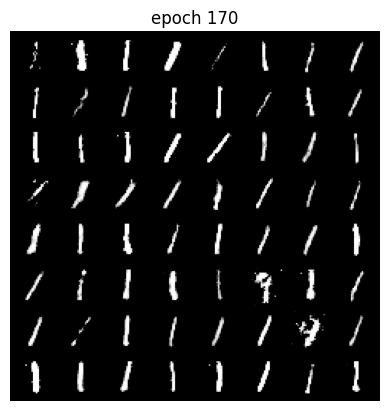

Epoch 170 of 200
Generator loss: 1.46963918, Discriminator loss: 0.35567844


118it [00:06, 19.24it/s]                         


Epoch 171 of 200
Generator loss: 1.43540180, Discriminator loss: 0.34544116


118it [00:06, 19.26it/s]                         


Epoch 172 of 200
Generator loss: 1.34323704, Discriminator loss: 0.36657891


118it [00:06, 18.77it/s]                         


Epoch 173 of 200
Generator loss: 1.39913094, Discriminator loss: 0.33955634


118it [00:06, 19.08it/s]                         


Epoch 174 of 200
Generator loss: 1.34502304, Discriminator loss: 0.36482656


118it [00:06, 19.06it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


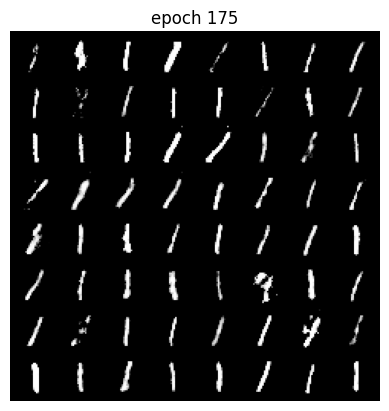

Epoch 175 of 200
Generator loss: 1.26395810, Discriminator loss: 0.37551707


118it [00:06, 19.34it/s]                         


Epoch 176 of 200
Generator loss: 1.30369329, Discriminator loss: 0.35790294


118it [00:06, 19.63it/s]                         


Epoch 177 of 200
Generator loss: 1.31351256, Discriminator loss: 0.38236898


118it [00:06, 19.51it/s]                         


Epoch 178 of 200
Generator loss: 1.38169539, Discriminator loss: 0.35824031


118it [00:06, 19.42it/s]                         


Epoch 179 of 200
Generator loss: 1.39979219, Discriminator loss: 0.34989682


118it [00:06, 18.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


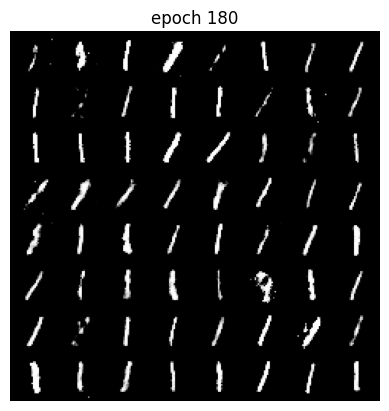

Epoch 180 of 200
Generator loss: 1.45722914, Discriminator loss: 0.35570985


118it [00:06, 19.50it/s]                         


Epoch 181 of 200
Generator loss: 1.36698484, Discriminator loss: 0.36949670


118it [00:06, 19.59it/s]                         


Epoch 182 of 200
Generator loss: 1.39836884, Discriminator loss: 0.35761222


118it [00:06, 19.46it/s]                         


Epoch 183 of 200
Generator loss: 1.33561301, Discriminator loss: 0.39108089


118it [00:06, 19.55it/s]                         


Epoch 184 of 200
Generator loss: 1.40064013, Discriminator loss: 0.35297075


118it [00:06, 19.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


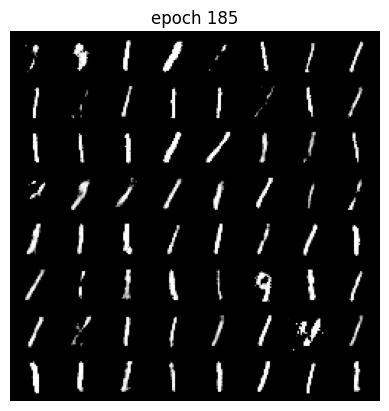

Epoch 185 of 200
Generator loss: 1.31537104, Discriminator loss: 0.39124012


118it [00:06, 19.23it/s]                         


Epoch 186 of 200
Generator loss: 1.27663982, Discriminator loss: 0.39144251


118it [00:06, 19.52it/s]                         


Epoch 187 of 200
Generator loss: 1.28413308, Discriminator loss: 0.38676375


118it [00:06, 19.53it/s]                         


Epoch 188 of 200
Generator loss: 1.41401172, Discriminator loss: 0.37345827


118it [00:06, 19.46it/s]                         


Epoch 189 of 200
Generator loss: 1.39841330, Discriminator loss: 0.37210730


118it [00:06, 19.51it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


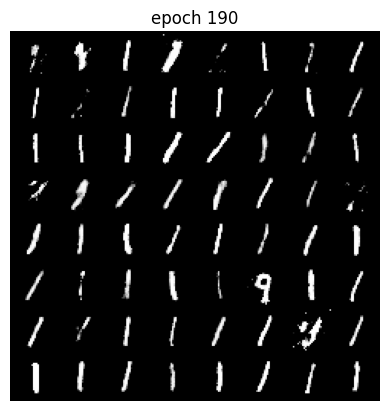

Epoch 190 of 200
Generator loss: 1.33974695, Discriminator loss: 0.38334116


118it [00:05, 19.70it/s]                         


Epoch 191 of 200
Generator loss: 1.31238139, Discriminator loss: 0.37691256


118it [00:06, 19.63it/s]                         


Epoch 192 of 200
Generator loss: 1.26007164, Discriminator loss: 0.39732516


118it [00:06, 19.29it/s]                         


Epoch 193 of 200
Generator loss: 1.27494788, Discriminator loss: 0.38962278


118it [00:06, 19.63it/s]                         


Epoch 194 of 200
Generator loss: 1.33817863, Discriminator loss: 0.37103796


118it [00:06, 19.61it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


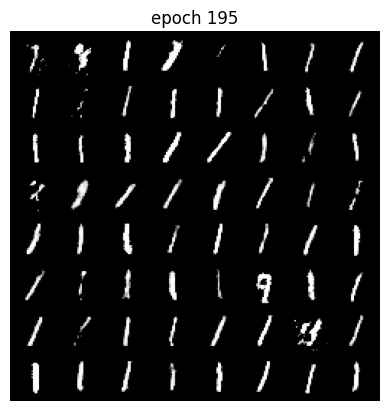

Epoch 195 of 200
Generator loss: 1.30757809, Discriminator loss: 0.38766307


118it [00:06, 19.24it/s]                         


Epoch 196 of 200
Generator loss: 1.36889184, Discriminator loss: 0.37528813


118it [00:06, 18.97it/s]                         


Epoch 197 of 200
Generator loss: 1.35487831, Discriminator loss: 0.37861815


118it [00:06, 18.75it/s]                         


Epoch 198 of 200
Generator loss: 1.38899708, Discriminator loss: 0.38531592


118it [00:06, 18.58it/s]                         


Epoch 199 of 200
Generator loss: 1.36501443, Discriminator loss: 0.38347566


118it [00:06, 18.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


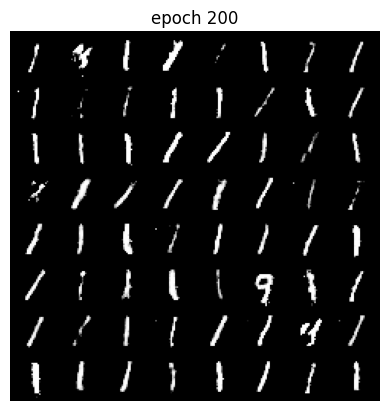

Epoch 200 of 200
Generator loss: 1.41089010, Discriminator loss: 0.36146030


In [28]:
method_num = 2
method_names = ['1_a', '1_b', '1_c']
method_1 = method_names[method_num]

epochs = 200 if method_num == 2 else 100

# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002, maximize= method_num==1)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

torch.manual_seed(7777)

def generator_loss(output, true_label=None):
    ############ YOUR CODE HERE ##########
    # print('output_gen=')
    # print(output.tolist())
    # print('true_label=')
    # print(true_label.tolist())
    l_g = criterion(output, label_fake(len(output)))
    # l_g /= len(output)
    return l_g
    ######################################

def generator_loss_1_b(output, true_label=None):
    return criterion(output, label_real(len(output)))

generator_losses = [generator_loss, generator_loss_1_b, generator_loss]
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    # print('output_disc=')
    # print(output.tolist())
    # print('true_label=')
    # print(true_label.tolist())
    l_d = criterion(output, true_label)
    # l_d /= len(output) 
    return l_d
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########         
        data_len = len(data[0]) # <-- not every batch will be of length train_loader.batch_size

        # Sample minibatch of m noise samples { z_1, ... , z_m } from noise prior p_g(z)
        samples_noise = create_noise(data_len, nz)

        # Sample miniabtch of m examples { x_1, ... , x_m } from the data
        samples_data = data[0].to(device)

        # Update the discriminator by ascending its stochastic gradient:
        optim_d.zero_grad()

        pred_gen_noise = generator.forward(samples_noise)        
        pred_dis_noise = discriminator.forward(pred_gen_noise)
        pred_dis_data = discriminator.forward(samples_data)

        expr_to_grad_d = discriminator_loss(pred_dis_data, label_fake(data_len)) + discriminator_loss(pred_dis_noise, label_real(data_len))
        # expr_to_grad_d = discriminator_loss(torch.cat((pred_dis_data, pred_dis_noise)), torch.cat((label_fake(data_len), label_real(data_len))))
        loss_d += expr_to_grad_d
        expr_to_grad_d /= data_len
        # print(f'expr_to_grad_d={expr_to_grad_d}')
        expr_to_grad_d.backward()
        optim_d.step()

        # print(f'method_num={method_num}, bi={bi}')
        if method_num == 2 and bi % 2 == 0:
            # print('skipping')
            continue

        # Update the generator by ascending its stochastic gradient:
        optim_g.zero_grad()

        # Sample minibatch of m noise samples { z_1, ... , z_m } from noise prior p_g(z) <-- different from first step, no reason to be same
        # samples_noise = create_noise(data_len, nz)
        pred_gen_noise = generator.forward(samples_noise)
        pred_dis_noise = discriminator.forward(pred_gen_noise)

        expr_to_grad_g = generator_losses[method_num](pred_dis_noise)
        loss_g += expr_to_grad_g
        expr_to_grad_g /= data_len
        # print(f'expr_to_grad_g={expr_to_grad_g}')
        expr_to_grad_g.backward()
        optim_g.step()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/{method_1}_gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [29]:
print('DONE TRAINING')
torch.save(generator.state_dict(), f'outputs/{method_1}_generator.pth')

DONE TRAINING


In [30]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave(f'outputs/{method_1}_generator_images.gif', imgs)

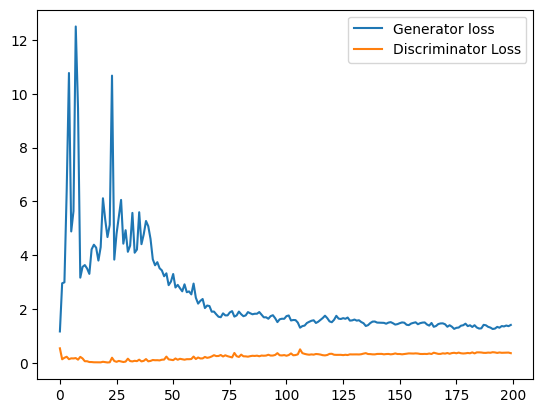

In [31]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot([l.item() for l in losses_g], label='Generator loss')
plt.plot([l.item() for l in losses_d], label='Discriminator Loss')
plt.legend()
plt.savefig(f'outputs/{method_1}_loss.png')

In [32]:
print([l.item() for l in losses_g])
print([l.item() for l in losses_d])

[1.1685259342193604, 2.9587254524230957, 2.994339942932129, 6.394687652587891, 10.773541450500488, 4.885239124298096, 5.640196323394775, 12.502800941467285, 9.461749076843262, 3.168299913406372, 3.5680270195007324, 3.6360490322113037, 3.508803606033325, 3.3079605102539062, 4.219878673553467, 4.391871452331543, 4.282679557800293, 3.8024511337280273, 4.304638862609863, 6.118265628814697, 5.327210903167725, 4.676816940307617, 5.132690906524658, 10.676020622253418, 3.8384883403778076, 4.795206546783447, 5.4134840965271, 6.057215213775635, 4.431578636169434, 4.931012153625488, 4.128453731536865, 4.35711669921875, 5.574680805206299, 4.0947489738464355, 4.211714267730713, 5.599811553955078, 4.412665843963623, 4.777198791503906, 5.27426815032959, 5.080317974090576, 4.606910228729248, 3.8510777950286865, 3.6283493041992188, 3.7435569763183594, 3.51778244972229, 3.437954902648926, 3.21975040435791, 3.3293659687042236, 2.889268398284912, 3.019622802734375, 3.303701639175415, 2.80242657661438, 2.9